
## TECHIN513:  Lab 1 - Elementary Music Synthesis

**Team Members**: Mingheng Wu, Yuxin Zhang

**Overview**

The purpose of this lab is to familiarize you with constructing and processing discrete-time audio signals. You will review how to synthesize music notes and play them. You will concatenate a series of music notes into a small music piece, add volume variation to the music piece, overlap the adjacent notes to further make the music smoother and more realistic.

Through this process, you will learn to perform the following sound synthesis tasks:
- Generating musical notes
- Improving the quality of the generated sound
- Overlapping notes

In [21]:
import numpy as np
import IPython.display as ipd
# Usage:
# ipd.Audio(audio_array, rate=sampling_rate, autoplay=True)
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.io import wavfile as wav

In [22]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)

In [23]:
def play(data, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    """Returns a playable audio object

    Args:
        data: The audio data to be played (as a NumPy array).
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    # Enter code here
    return ipd.Audio(data, rate=sample_rate, autoplay=True)
    

def display_envelope(signal, duration=-1, sample_rate=DEFAULT_SAMPLE_RATE, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    """
    Plots the envelope of a duration of the generated audio. 

    Args:
        signal: The audio signal to be displayed (as a NumPy array).
        duration: The length of hte signal to be displayed. -1 to display entire signal.
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    
    if duration < 0:
        duration = len(signal)/sample_rate
    
    n = int(duration*sample_rate)
    
    analytic_signal = hilbert(signal[0:n])
    amplitude_envelope = np.abs(analytic_signal)
        
    t = np.linspace(0,duration,len(amplitude_envelope))
    
    plt.figure()    
    plt.plot(t,amplitude_envelope)
    plt.show()

## Task 1: Generating Musical Notes

In [4]:
# defining note function 
def note(frequency, duration, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    """Generates samples of a musical note.

    Samples are generated according to following equation:

        y(t) = A sin(wt)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples representing the note.
    """
    # Enter code here
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return amplitude * np.sin(2 * np.pi * frequency * t)


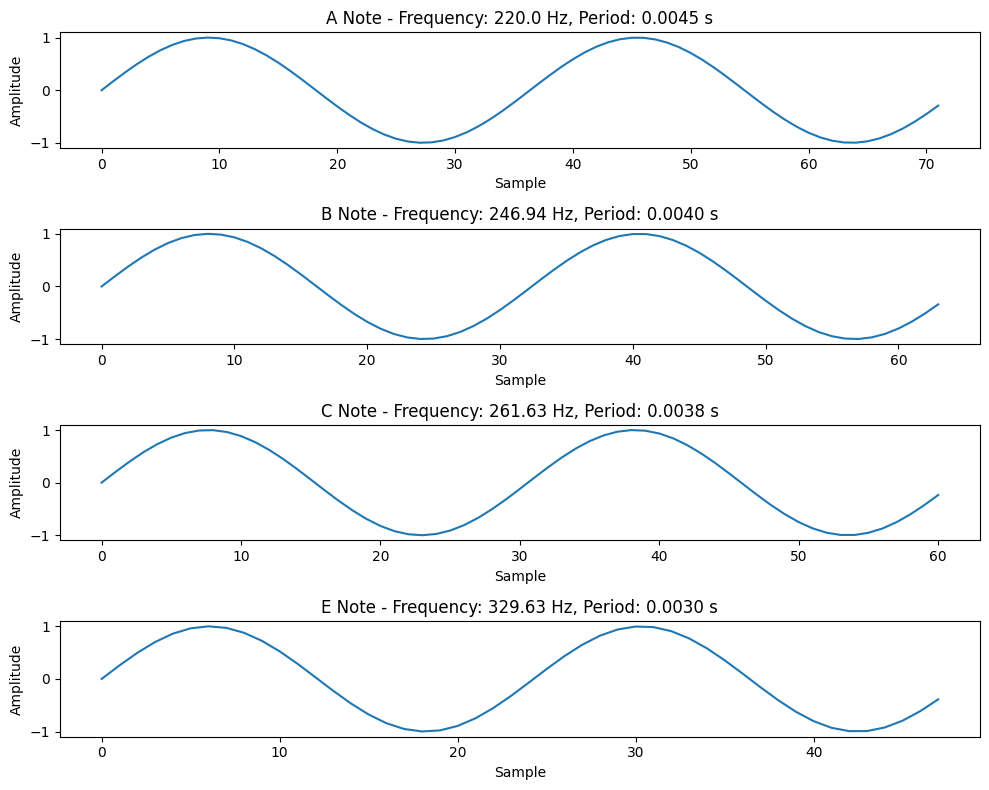

In [20]:
# Generate pure tones for A, B, C, E
duration = 0.01  # 10 ms for visualization
tone_A = note(A, duration)
tone_B = note(B, duration)
tone_C = note(C, duration)
tone_E = note(E, duration)

# Calculate periods (T = 1/f)
period_A = 1 / A
period_B = 1 / B
period_C = 1 / C
period_E = 1 / E

# Visualization
plt.figure(figsize=(10, 8))

# Plot A
plt.subplot(4, 1, 1)
plt.plot(tone_A[:int(DEFAULT_SAMPLE_RATE * period_A * 2)])  # Plot two periods
plt.title(f"A Note - Frequency: {A} Hz, Period: {period_A:.4f} s")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot B
plt.subplot(4, 1, 2)
plt.plot(tone_B[:int(DEFAULT_SAMPLE_RATE * period_B * 2)])  # Plot two periods
plt.title(f"B Note - Frequency: {B:.2f} Hz, Period: {period_B:.4f} s")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot C
plt.subplot(4, 1, 3)
plt.plot(tone_C[:int(DEFAULT_SAMPLE_RATE * period_C * 2)])  # Plot two periods
plt.title(f"C Note - Frequency: {C:.2f} Hz, Period: {period_C:.4f} s")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot E
plt.subplot(4, 1, 4)
plt.plot(tone_E[:int(DEFAULT_SAMPLE_RATE * period_E * 2)])  # Plot two periods
plt.title(f"E Note - Frequency: {E:.2f} Hz, Period: {period_E:.4f} s")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

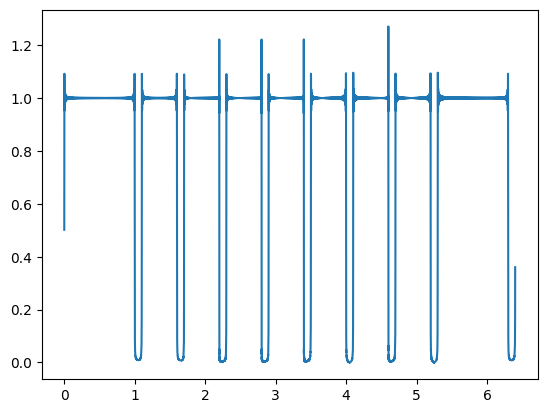

In [5]:
QUARTER_NOTE_DURATION = 0.5 
HALF_NOTE_DURATION = 2 * QUARTER_NOTE_DURATION
REST_DURATION = 0.1 

def rest(duration, sample_rate=DEFAULT_SAMPLE_RATE):
    return np.zeros(int(sample_rate * duration))

# Define the musical score for Scarborough Fair
# Sequence of tuples: (note_frequency, duration)
score = [
    (A, HALF_NOTE_DURATION),
    (A, QUARTER_NOTE_DURATION), 
    (E, QUARTER_NOTE_DURATION),
    (E, QUARTER_NOTE_DURATION),
    (E, QUARTER_NOTE_DURATION), 
    (B, QUARTER_NOTE_DURATION),
    (C, QUARTER_NOTE_DURATION),
    (B, QUARTER_NOTE_DURATION),
    (A, HALF_NOTE_DURATION),
]


audio_samples = []
for freq, duration in score:
    audio_samples.append(note(freq, duration))
    audio_samples.append(rest(REST_DURATION))

# Concatenate all audio samples
audio_samples = np.concatenate(audio_samples)

display_envelope(audio_samples)


# Play the audio sample
audio_player = play(audio_samples)
audio_player


## Task 2: Time Scaling and Time Shifting Audio Signals

In [6]:
ipd.Audio('train32.wav')

Sampling rate: 32000Hz


Text(0.5, 0, 'Time Index')

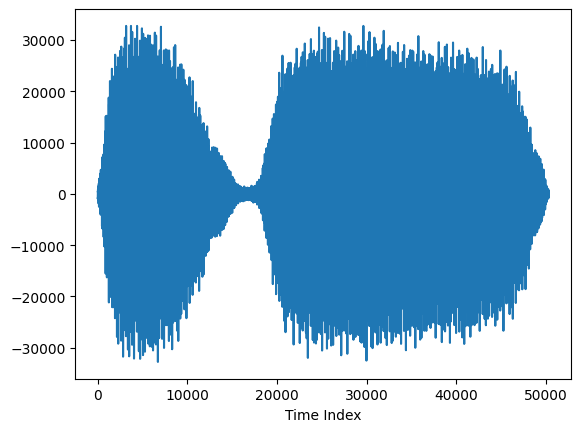

In [7]:
fs1, w = wav.read('train32.wav')                      # Load audio file
print('Sampling rate: ' + str(fs1) + 'Hz')                # Extract sampling frequency

plt.figure()    
_ = plt.plot(np.arange(np.size(w)), w)
plt.xlabel("Time Index")


In [8]:
# your code of task 2 goes below
def time_scale(signal, a, fs):
    """
    Perform time scaling on an audio waveform.

    Args:
        signal (numpy array): Input numpy array.
        a (float): Time scaling factor.
        fs (int): Sampling frequency (used to handle time shift in seconds if needed).
    
    Returns:
        numpy array: Transformed waveform.
    """
    n = np.arange(len(signal))  # Original time indices
    
    if a > 1:  # Signal compression
        indices = (n / a).astype(int)  # Scale down the indices
        indices = indices[indices < len(signal)]  # Ensure indices are within bounds
        transformed_signal = signal[indices]
    elif a < 1 and a > 0:  # Signal expansion
        indices = np.arange(0, len(signal), 1/a).astype(int)
        indices = indices[indices < len(signal)]
        transformed_signal = signal[indices]
    elif a == 1:
        transformed_signal = signal
    else:
        raise ValueError("Invalid choice of a. Must be > 0.")

    return transformed_signal


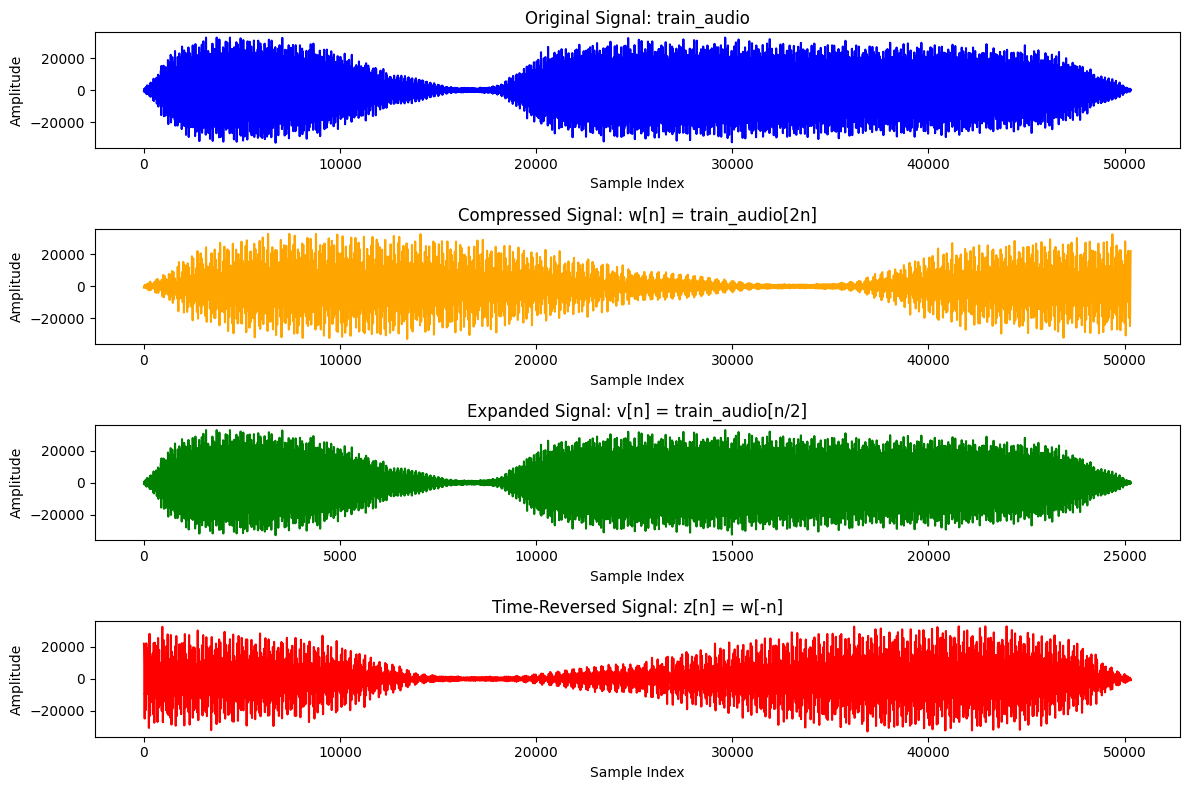

In [9]:
# your code goes here
fs, train_audio = wav.read('train32.wav')                      # Load audio file


# Create scaled and shifted signals
w = time_scale(train_audio, 2, fs)  # Signal w[n] = train_audio[2n]
v = time_scale(train_audio, 0.5, fs)  # Signal v[n] = train_audio[n/2]
z = w[::-1]  # Time-reversed version of w[n]: z[n] = w[-n]

# Save each resulting signal in wav files
wav.write("scaled_compressed.wav", fs, w.astype(np.int16))
wav.write("scaled_expanded.wav", fs, v.astype(np.int16))
wav.write("time_reversed.wav", fs, z.astype(np.int16))


plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(train_audio, color="blue")
plt.title("Original Signal: train_audio")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.plot(w, color="orange")
plt.title("Compressed Signal: w[n] = train_audio[2n]")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.plot(v, color="green")
plt.title("Expanded Signal: v[n] = train_audio[n/2]")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.plot(z, color="red")
plt.title("Time-Reversed Signal: z[n] = w[-n]")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [10]:

def time_shift(signal, b):
    """
    Perform time shifting on a signal.

    Args:
        signal (numpy array): Input numpy array.
        b (int): Time shifting factor.
        fs (int): Sampling frequency (used to handle time shift in seconds if needed).
    
    Returns:
        numpy array: Transformed waveform.
    """

    # Check if `b` is a valid integer
    if not isinstance(b, int):
        raise ValueError("Invalid choice of b.")
    
    # Perform time shifting
    transformed_signal = np.roll(signal, b)
    
    # Handle zero-padding for positive or negative shifts
    if b > 0:
        transformed_signal[:b] = 0  # Zero-pad the beginning
    elif b < 0:
        transformed_signal[b:] = 0  # Zero-pad the end

    return transformed_signal

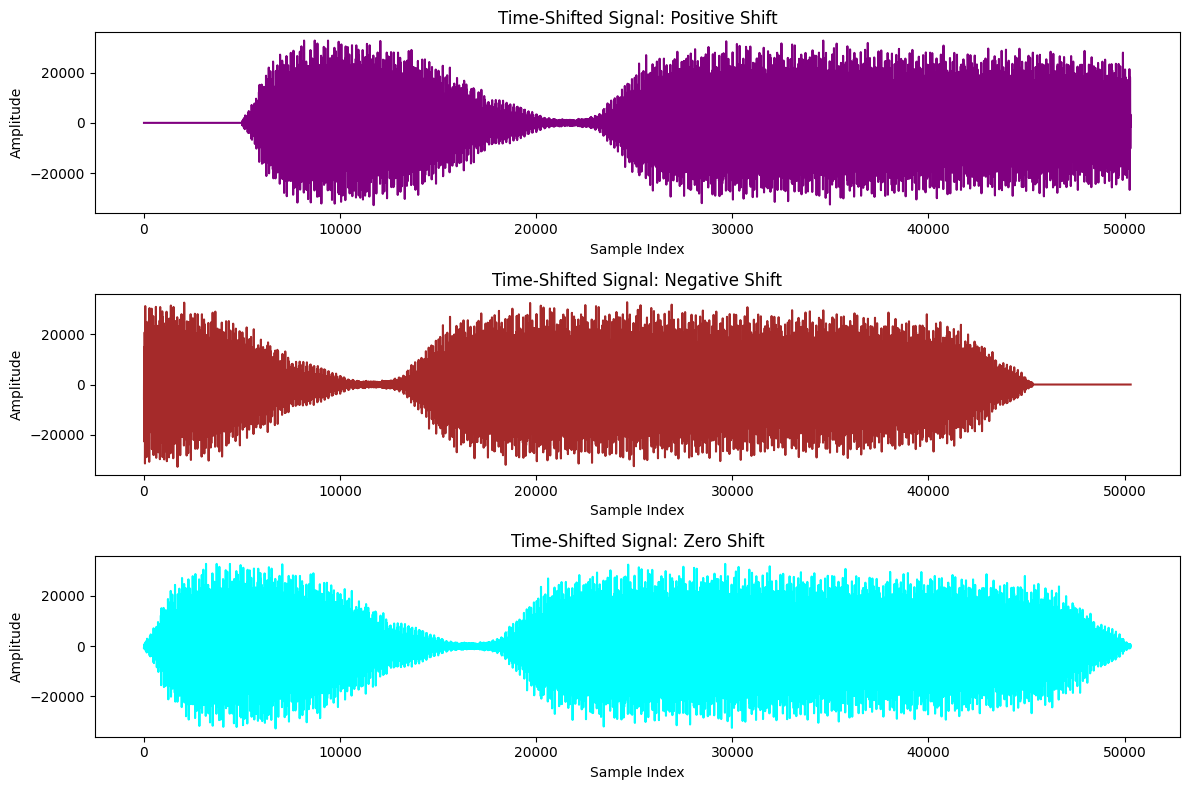

In [11]:
# your code goes here

shifted_positive = time_shift(train_audio, 5000)  # Positive shift
shifted_negative = time_shift(train_audio, -5000)  # Negative shift
shifted_zero = time_shift(train_audio, 0)  # Zero shift

# Visualize time-shifted signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(shifted_positive, color="purple")
plt.title("Time-Shifted Signal: Positive Shift")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(shifted_negative, color="brown")
plt.title("Time-Shifted Signal: Negative Shift")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(shifted_zero, color="cyan")
plt.title("Time-Shifted Signal: Zero Shift")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [12]:
ipd.Audio('train32.wav')

In [13]:
ipd.Audio('scaled_compressed.wav')

In [14]:
ipd.Audio('scaled_expanded.wav')

In [15]:
ipd.Audio('time_reversed.wav')

## Task 3: Volume Variations

In [16]:
# Volume Variation Function Attack, Decay, Sustain and Release (ADSR)
def adsr(note):
    """Generates an ADSR envelope and applies it to a note.

        A: Linear increase to 60% amplitude over 20% length.
        D: Linear decrease to 50% amplitude over 4% length.
        S: Constant 50% amplitude over 40% length.
        R: Linear decrease to 0% amplitude over 36% length.

    Args:
        note: The note to be modified.

    Returns:
        A note that has been scaled by the ADSR envelope.
    """
    # Enter code here
    N = len(note)
    A_len = int(0.2 * N)
    D_len = int(0.04 * N)
    S_len = int(0.4 * N)
    R_len = N - (A_len + D_len + S_len)
    A = np.linspace(0, 0.6, A_len)
    D = np.linspace(0.6, 0.5, D_len)
    S = np.full(S_len, 0.5)
    R = np.linspace(0.5, 0, R_len)
    envelope = np.concatenate([A, D, S, R])
    if len(envelope) > N:
        envelope = envelope[:N]
    elif len(envelope) < N:
        envelope = np.pad(envelope, (0, N - len(envelope)), mode='constant')
    return note * envelope






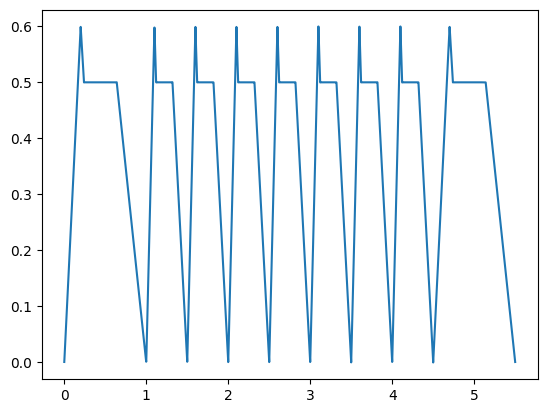

In [17]:


# Define the musical score for Scarborough Fair
# Sequence of tuples: (note_frequency, duration)
# score = [
#     (A, HALF_NOTE_DURATION),
#     (A, QUARTER_NOTE_DURATION), 
#     (E, QUARTER_NOTE_DURATION),
#     (E, QUARTER_NOTE_DURATION),
#     (E, QUARTER_NOTE_DURATION), 
#     (B, QUARTER_NOTE_DURATION),
#     (C, QUARTER_NOTE_DURATION),
#     (B, QUARTER_NOTE_DURATION),
#     (A, HALF_NOTE_DURATION),
# ]


audio_samples = []
for freq, duration in score:
    audio_samples.append(adsr(note(freq, duration)))
    # audio_samples.append(rest(REST_DURATION))

# Concatenate all audio samples
audio_samples = np.concatenate(audio_samples)

display_envelope(audio_samples)


# Play the audio sample
audio_player = play(audio_samples)
audio_player





**Supplementary Questions:** Instead of enveloping with the ADSR function, how would you envelope with a decaying exponential?

## Task 4: Overlapping Notes

In [18]:
def overlap(notes, offset=800):
    """Joins notes together with overlap between consecutive notes.

    Args:
        notes: An array of notes to be joined.
        offset: The amount of allowable overlap between consecutive notes.

    Returns:
        A score made from the input notes.
    """
    # Enter code here
    combined = notes[0]

    for i in range(1, len(notes)):
        actual_offset = min(len(combined), len(notes[i]), offset)
        overlap_start = combined[-actual_offset:]
        next_start = notes[i][:actual_offset]
        overlap_region = overlap_start + next_start
        combined = np.concatenate((combined[:-actual_offset], overlap_region, notes[i][actual_offset:]))

    return combined



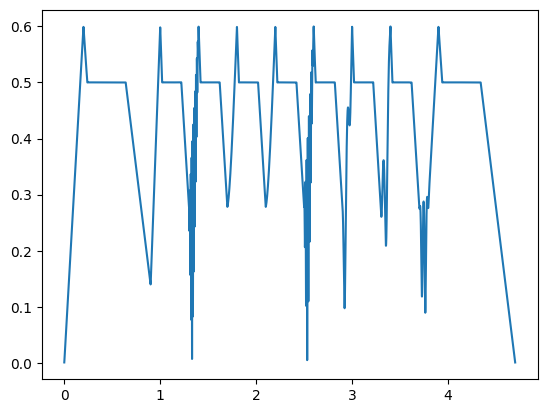

In [19]:
# Smooth the sound by overlapping the notes.
audio_samples = []
for freq, duration in score:
    audio_samples.append(adsr(note(freq, duration)))
    # audio_samples.append(rest(REST_DURATION))

audio_samples = overlap(audio_samples)

# Display the envelope
display_envelope(audio_samples)

# Play the audio sample
audio_player = play(audio_samples)
audio_player